In [2]:
import numpy as np
import string
import os
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.layers import Embedding, Flatten, Dense
from keras.models import Sequential
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from google.colab import drive

In [3]:
samples = ['The cat sat on the mat.', 'The dog ate my homework. Really!']

def vectorizeWordLevel(samples, maxlen=10):
  token_index= {}
  for sample in samples:
    for word in sample.split():
      if word not in token_index:
        token_index[word] = len(token_index) + 1
  vocab_size = len(token_index)
  vectorizedSeqs = np.zeros((len(samples), maxlen, vocab_size+1))
  for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:maxlen]:
      index = token_index.get(word)
      vectorizedSeqs[i, j, index] = 1.
  return vectorizedSeqs

def vectorizeCharLevel(samples, maxlen=50):
  characters = string.printable
  token_index = dict(zip(characters, range(1,len(characters)+1)))
  vocab_size = len(token_index)
  vectorizedSeqs = np.zeros((len(samples), maxlen, vocab_size+1))
  for i, sample in enumerate(samples):
    for j, char in enumerate(sample[:maxlen]):
      index = token_index.get(char)
      vectorizedSeqs[i, j, index] = 1.
  return vectorizedSeqs
word_level_encodings = vectorizeWordLevel(samples)
char_level_encodings = vectorizeCharLevel(samples)
print(word_level_encodings.shape)
print(char_level_encodings.shape)

(2, 10, 12)
(2, 50, 101)


In [4]:
# alternatively, use keras
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(samples)
sequences = tokenizer.texts_to_sequences(samples)
one_hot_seqs = tokenizer.texts_to_matrix(samples, mode='binary')
print(one_hot_seqs)
print(tokenizer.word_index)

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
{'the': 1, 'cat': 2, 'sat': 3, 'on': 4, 'mat': 5, 'dog': 6, 'ate': 7, 'my': 8, 'homework': 9, 'really': 10}


In [5]:
# use hashing to save memory, downside: collisions cause information loss
def vectorizeWordLevelByHashing(samples, dimensionality, maxlen=10):
  vectorized_seqs = np.zeros((len(samples), maxlen, dimensionality))
  for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:maxlen]:
      index = abs(hash(word)) % dimensionality
      vectorized_seqs[i, j, index] = 1.
  return vectorized_seqs
vectorizeWordLevelByHashing(samples, 1000, 10)

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [6]:
# one hot vectors are sparse, high dimensional and hardcoded
# let's explore embeddings which are dense, lower-dimensional and learned
max_words = 10000
maxlen = 20
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

17465344/17464789 [==============================] - 0s 0us/step


In [7]:
model = Sequential()
model.add(Embedding(max_words, 8, input_length=maxlen))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 8)             80000     
_________________________________________________________________
flatten (Flatten)            (None, 160)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 - 1s - loss: 0.6716 - acc: 0.6172 - val_loss: 0.6231 - val_acc: 0.6940
Epoch 2/10
625/625 - 1s - loss: 0.5447 - acc: 0.7506 - val_loss: 0.5257 - val_acc: 0.7312
Epoch 3/10
625/625 - 1s - loss: 0.4628 - acc: 0.7859 - val_loss: 0.4984 - val_acc: 0.7434
Epoch 4/10
625/625 - 1s - loss: 0.4239 - acc: 0.8070 - val_loss: 0.4911 - val_acc: 0.7548
Epoch 5/10
625/625 - 1

In [8]:
drive.mount('/content/gdrive')
%cd /content/gdrive/My Drive/
!wget --no-check-certificate http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz -O aclImdb_v1_tar.gz
!tar xzf aclImdb_v1_tar.gz

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive


In [18]:
from tqdm import tqdm
imdb_dir = 'aclImdb'
train_dir = os.path.join(imdb_dir,'train')

labels = []
texts = []

maxlen = 100
training_samples = 200
validation_samples = 500
max_words = 10000

for label_type in ['neg', 'pos']:
  dir_name = os.path.join(train_dir, label_type)
  for fname in tqdm(os.listdir(dir_name)[:training_samples+validation_samples]):
    if fname[-4:] == '.txt':
      f = open(os.path.join(dir_name, fname))
      texts.append(f.read())
      f.close()
      if label_type == 'neg':
        labels.append(0)
      else:
        labels.append(1)

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print("Unique tokens:", len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels)
print(data.shape)
print(labels.shape)



  0%|          | 0/700 [00:00<?, ?it/s]

 14%|█▍        | 97/700 [00:00<00:00, 969.86it/s]

 32%|███▏      | 226/700 [00:00<00:00, 1046.31it/s]

 51%|█████     | 358/700 [00:00<00:00, 1113.88it/s]

 70%|██████▉   | 489/700 [00:00<00:00, 1163.80it/s]

100%|██████████| 700/700 [00:00<00:00, 1196.60it/s]


  0%|          | 0/700 [00:00<?, ?it/s]

  8%|▊         | 56/700 [00:00<00:06, 97.11it/s]

  8%|▊         | 59/700 [00:02<01:50,  5.78it/s]

  9%|▉         | 62/700 [00:04<03:20,  3.18it/s]

  9%|▉         | 64/700 [00:05<04:37,  2.29it/s]

  9%|▉         | 66/700 [00:06<05:05,  2.08it/s]

 10%|▉         | 67/700 [00:07<05:40,  1.86it/s]

 10%|▉         | 68/700 [00:08<06:14,  1.69it/s]

 10%|▉         | 69/700 [00:08<06:08,  1.71it/s]

 10%|█         | 70/700 [00:09<06:27,  1.63it/s]

 10%|█         | 71/700 [00:09<06:11,  1.69it/s]

 10%|█         | 72/700 [00:10<06:13,  1.68it/s]

 10%|█         | 73/700 [00:11<05:59,  1.75it/s]

 11%|█         | 74/700 [00:11<05:35,  1.86it/s]

 1

Unique tokens: 22422
(1400, 100)
(1400,)


In [19]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

In [20]:
!wget --no-check-certificate http://nlp.stanford.edu/data/glove.6B.zip -O glove.6B.zip

--2020-09-02 13:22:18--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-09-02 13:22:18--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-09-02 13:22:19--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [27]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [29]:
embeddings_index = {}
f = open('glove.6B.100d.txt')
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()
print("No. of word vectors:", len(embeddings_index))

No. of word vectors: 400000


In [30]:
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if i < max_words and embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [31]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [33]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

In [34]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val), verbose=2)
model.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
7/7 - 0s - loss: 2.6776 - acc: 0.4350 - val_loss: 0.7122 - val_acc: 0.4780
Epoch 2/10
7/7 - 0s - loss: 0.6054 - acc: 0.6500 - val_loss: 0.6999 - val_acc: 0.5080
Epoch 3/10
7/7 - 0s - loss: 0.5438 - acc: 0.6400 - val_loss: 0.7146 - val_acc: 0.4780
Epoch 4/10
7/7 - 0s - loss: 0.5040 - acc: 0.6550 - val_loss: 0.7117 - val_acc: 0.4880
Epoch 5/10
7/7 - 0s - loss: 0.4726 - acc: 0.7300 - val_loss: 1.0840 - val_acc: 0.4780
Epoch 6/10
7/7 - 0s - loss: 0.4424 - acc: 0.7600 - val_loss: 0.7687 - val_acc: 0.4980
Epoch 7/10
7/7 - 0s - loss: 0.3820 - acc: 0.7700 - val_loss: 1.0242 - val_acc: 0.4780
Epoch 8/10
7/7 - 0s - loss: 0.4028 - acc: 0.8050 - val_loss: 0.7466 - val_acc: 0.4960
Epoch 9/10
7/7 - 0s - loss: 0.3606 - acc: 0.8500 - val_loss: 0.9762 - val_acc: 0.4820
Epoch 10/10
7/7 - 0s - loss: 0.3267 - acc: 0.9300 - val_loss: 0.7558 - val_acc: 0.5200


In [35]:
def plot_metrics(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(1, len(acc) + 1)

  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

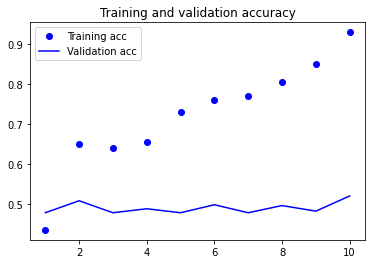

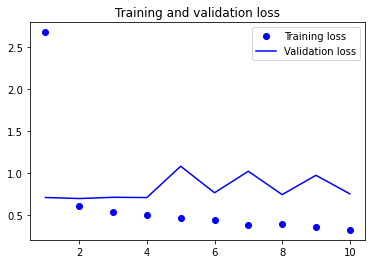

In [36]:
plot_metrics(history)

In [38]:
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_2 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [39]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32,
                    validation_data=(x_val, y_val), verbose=2)

Epoch 1/10
7/7 - 0s - loss: 0.6941 - acc: 0.5050 - val_loss: 0.6949 - val_acc: 0.5060
Epoch 2/10
7/7 - 0s - loss: 0.5070 - acc: 0.9700 - val_loss: 0.6940 - val_acc: 0.4940
Epoch 3/10
7/7 - 0s - loss: 0.2792 - acc: 1.0000 - val_loss: 0.6981 - val_acc: 0.4960
Epoch 4/10
7/7 - 0s - loss: 0.1226 - acc: 1.0000 - val_loss: 0.7012 - val_acc: 0.5020
Epoch 5/10
7/7 - 0s - loss: 0.0565 - acc: 1.0000 - val_loss: 0.6958 - val_acc: 0.5300
Epoch 6/10
7/7 - 0s - loss: 0.0287 - acc: 1.0000 - val_loss: 0.7082 - val_acc: 0.4940
Epoch 7/10
7/7 - 0s - loss: 0.0157 - acc: 1.0000 - val_loss: 0.7136 - val_acc: 0.4920
Epoch 8/10
7/7 - 0s - loss: 0.0091 - acc: 1.0000 - val_loss: 0.7614 - val_acc: 0.4980
Epoch 9/10
7/7 - 0s - loss: 0.0056 - acc: 1.0000 - val_loss: 0.7379 - val_acc: 0.5100
Epoch 10/10
7/7 - 0s - loss: 0.0032 - acc: 1.0000 - val_loss: 0.7443 - val_acc: 0.5100


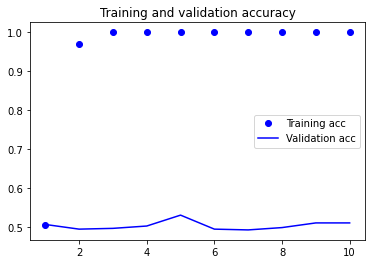

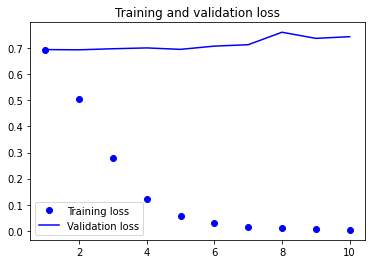

In [40]:
plot_metrics(history)

In [43]:
test_dir = os.path.join(imdb_dir, 'test')

labels = []
texts = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type)
    for fname in tqdm(sorted(os.listdir(dir_name)[:100])):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)



  0%|          | 0/100 [00:00<?, ?it/s]

  1%|          | 1/100 [00:00<01:00,  1.63it/s]

  2%|▏         | 2/100 [00:01<01:05,  1.50it/s]

  3%|▎         | 3/100 [00:02<01:17,  1.26it/s]

  4%|▍         | 4/100 [00:03<01:07,  1.42it/s]

  5%|▌         | 5/100 [00:04<01:21,  1.16it/s]

  6%|▌         | 6/100 [00:04<01:10,  1.34it/s]

  7%|▋         | 7/100 [00:05<01:06,  1.39it/s]

  8%|▊         | 8/100 [00:06<01:04,  1.42it/s]

  9%|▉         | 9/100 [00:06<00:58,  1.55it/s]

 10%|█         | 10/100 [00:07<00:55,  1.61it/s]

 11%|█         | 11/100 [00:07<00:58,  1.53it/s]

 12%|█▏        | 12/100 [00:08<00:58,  1.50it/s]

 13%|█▎        | 13/100 [00:09<01:00,  1.44it/s]

 14%|█▍        | 14/100 [00:09<00:54,  1.58it/s]

 15%|█▌        | 15/100 [00:10<00:50,  1.69it/s]

 16%|█▌        | 16/100 [00:10<00:52,  1.61it/s]

 17%|█▋        | 17/100 [00:11<00:50,  1.64it/s]

 18%|█▊        | 18/100 [00:12<00:51,  1.60it/s]

 19%|█▉        | 19/100 [00:12<00:51,  1.57it/s]

 20%|██        |

In [44]:
model.load_weights('pre_trained_glove_model.h5')
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.7430 - acc: 0.5500


[0.7429929971694946, 0.550000011920929]

In [45]:
#Working with just a handful of training samples is hard!